In [2]:
!pip install opencv-python
!pip install matplotlib

In [17]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import glob
from google.colab.patches import cv2_imshow
%matplotlib inline

In [18]:
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 30, 0.001)
# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((6*7,3), np.float32)
objp[:,:2] = np.mgrid[0:7,0:6].T.reshape(-1,2)
# Arrays to store object points and image points from all the images.
objpoints = [] # 3d point in real world space
imgpoints = [] # 2d points in image plane.
images = glob.glob('*.jpg')



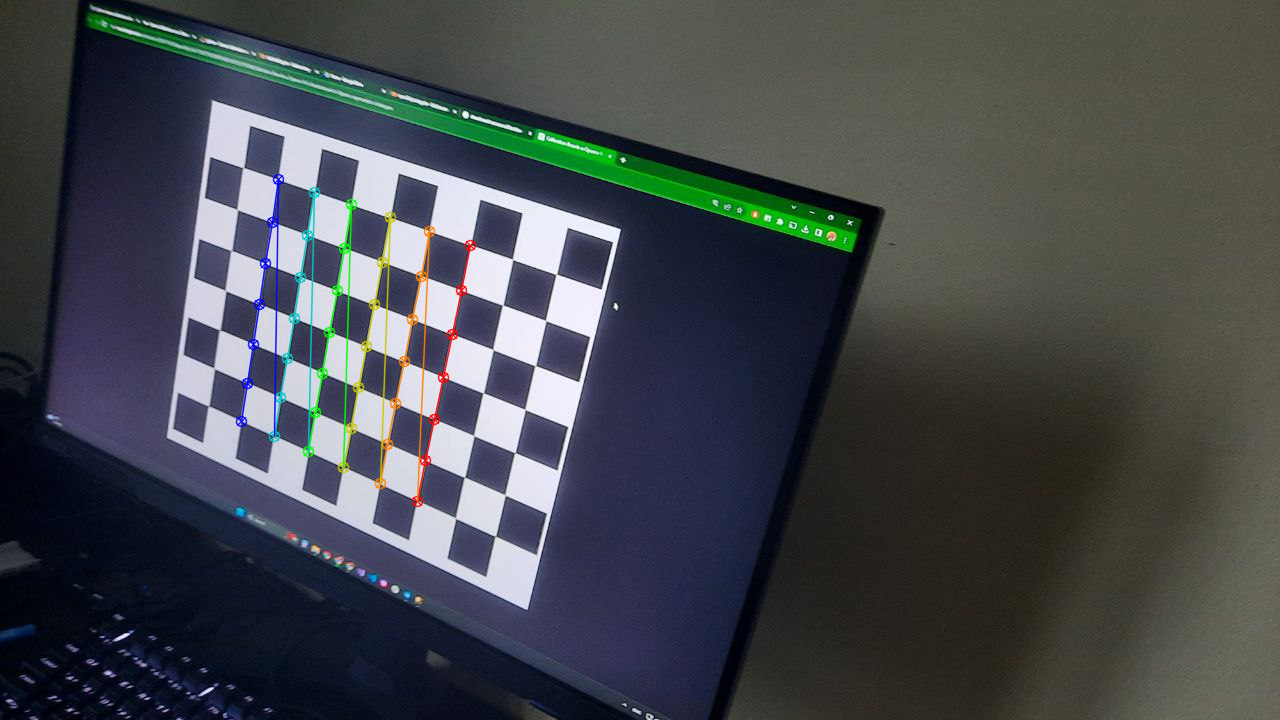

In [21]:
for fname in images:
    img = cv.imread(fname)
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    # Find the chess board corners
    ret, corners = cv.findChessboardCorners(gray, (7,6), None)
    # If found, add object points, image points (after refining them)
    if ret == True:
        objpoints.append(objp)
        corners2 = cv.cornerSubPix(gray,corners, (11,11), (-1,-1), criteria)
        imgpoints.append(corners2)
        # Draw and display the corners
        cv.drawChessboardCorners(img, (7,6), corners2, ret)
        cv2_imshow( img)
        cv.waitKey(500)
cv.destroyAllWindows()

In [28]:
ret, mtx, dist, rvecs, tvecs = cv.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)
img = cv.imread('chessboard.jpg')
h,  w = img.shape[:2]
newcameramtx, roi = cv.getOptimalNewCameraMatrix(mtx, dist, (w,h), 1, (w,h))


print("intrinsic matrix: \n", mtx)
print("new intrinsic matrix: \n", newcameramtx)

intrinsic matrix: 
 [[1.29080040e+03 0.00000000e+00 6.18679482e+02]
 [0.00000000e+00 1.17796376e+03 3.48753230e+02]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]
new intrinsic matrix: 
 [[1.32274325e+03 0.00000000e+00 6.28011574e+02]
 [0.00000000e+00 1.18899909e+03 3.50212786e+02]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]


total error:  0.015681976102599558


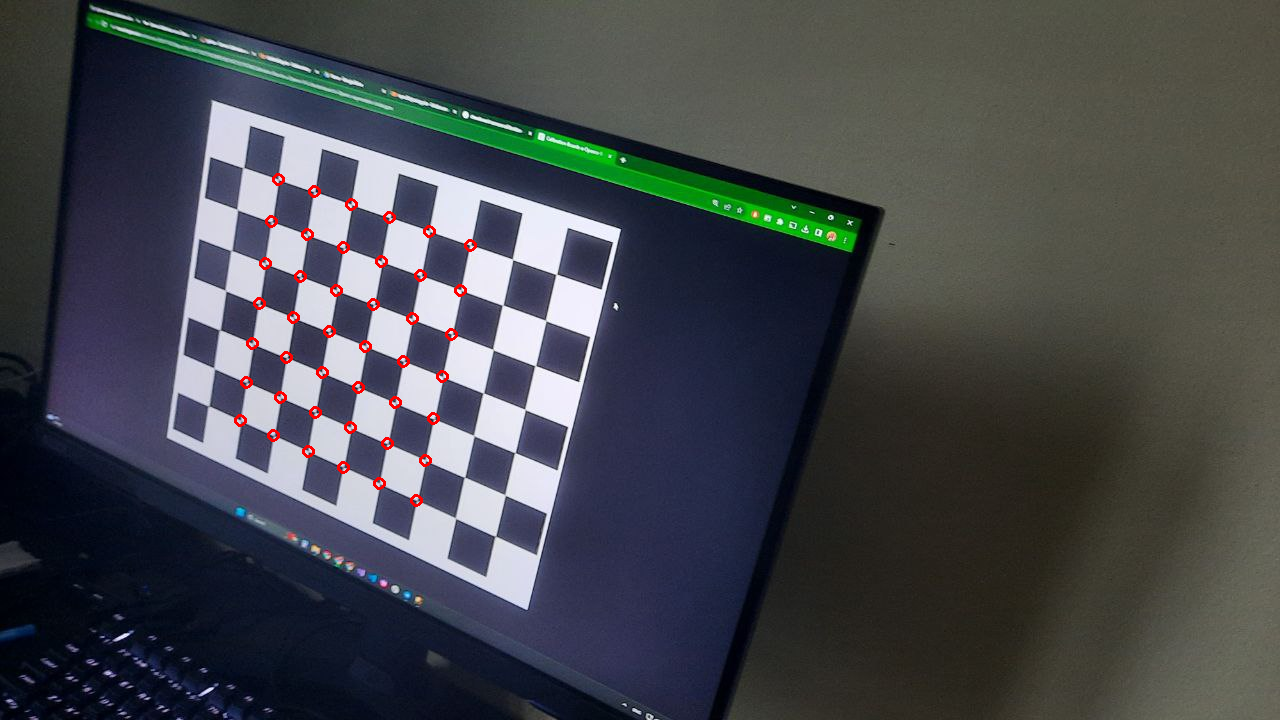

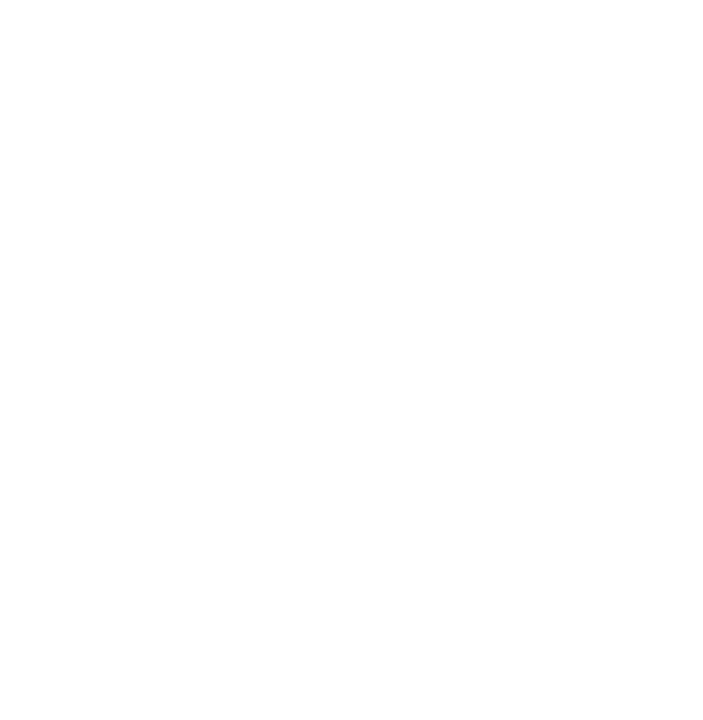

In [33]:
mean_error = 0
imgpoints2_list = []
for i in range(len(objpoints)):
  imgpoints2, _ = cv.projectPoints(objpoints[i], rvecs[i], tvecs[i], mtx, dist)
  imgpoints2_list.append(imgpoints2)

  error = cv.norm(imgpoints[i], imgpoints2, cv.NORM_L2) / len(imgpoints2)
  mean_error += error

print("total error: ", mean_error/len(objpoints))

plt.figure(figsize=(30,20))
for i, fname in enumerate(images):
  img = cv.imread(fname)

  img_pts = img.copy()
  for point_orig in imgpoints2_list[i]:
    point = point_orig[0]
    img_pts = cv.circle(img_pts, tuple(point.astype(int)), radius=5, color=(0,0,255), thickness=2)

  plt.subplot(2,3,i+1)
  cv2_imshow(img_pts)
  plt.axis("off")

plt.show()